## Q1).  Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


# Fraud_check Data

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formate = 'retina'
plt.rcParams['figure.figsize']= (10,8)
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [163]:
data = pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/14 Decision Trees/Fraud_check.csv')

In [164]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [165]:
data.shape

(600, 6)

In [166]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [167]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [168]:
data.loc[data['Taxable.Income']>=30000, 'Income']='Good'
data.loc[data['Taxable.Income']<=30000, 'Income']='Risky'

In [169]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [170]:
# Complete iris dataset
label_encoder= preprocessing.LabelEncoder()
data['Income']= label_encoder.fit_transform(data['Income'])
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])


In [171]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [173]:
#Droping the Taxable income variable - we taken that as Income description
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   Income           600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [175]:
data['Income'].value_counts()

0    476
1    124
Name: Income, dtype: int64

In [176]:
#diving data for traing and test
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [177]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [178]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32

In [179]:
data['Income'].unique()

array([0, 1])

In [180]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=40)

In [181]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(480, 5) (120, 5) (480,) (120,)


## Building Decision Tree Clasifier using Entropy Criteria

In [182]:
model= DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

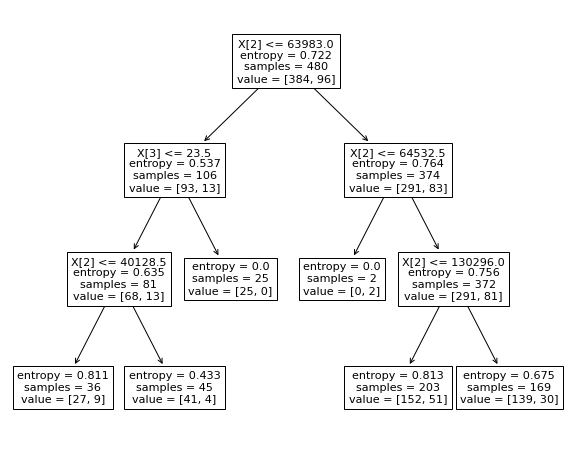

In [183]:
tree.plot_tree(model);

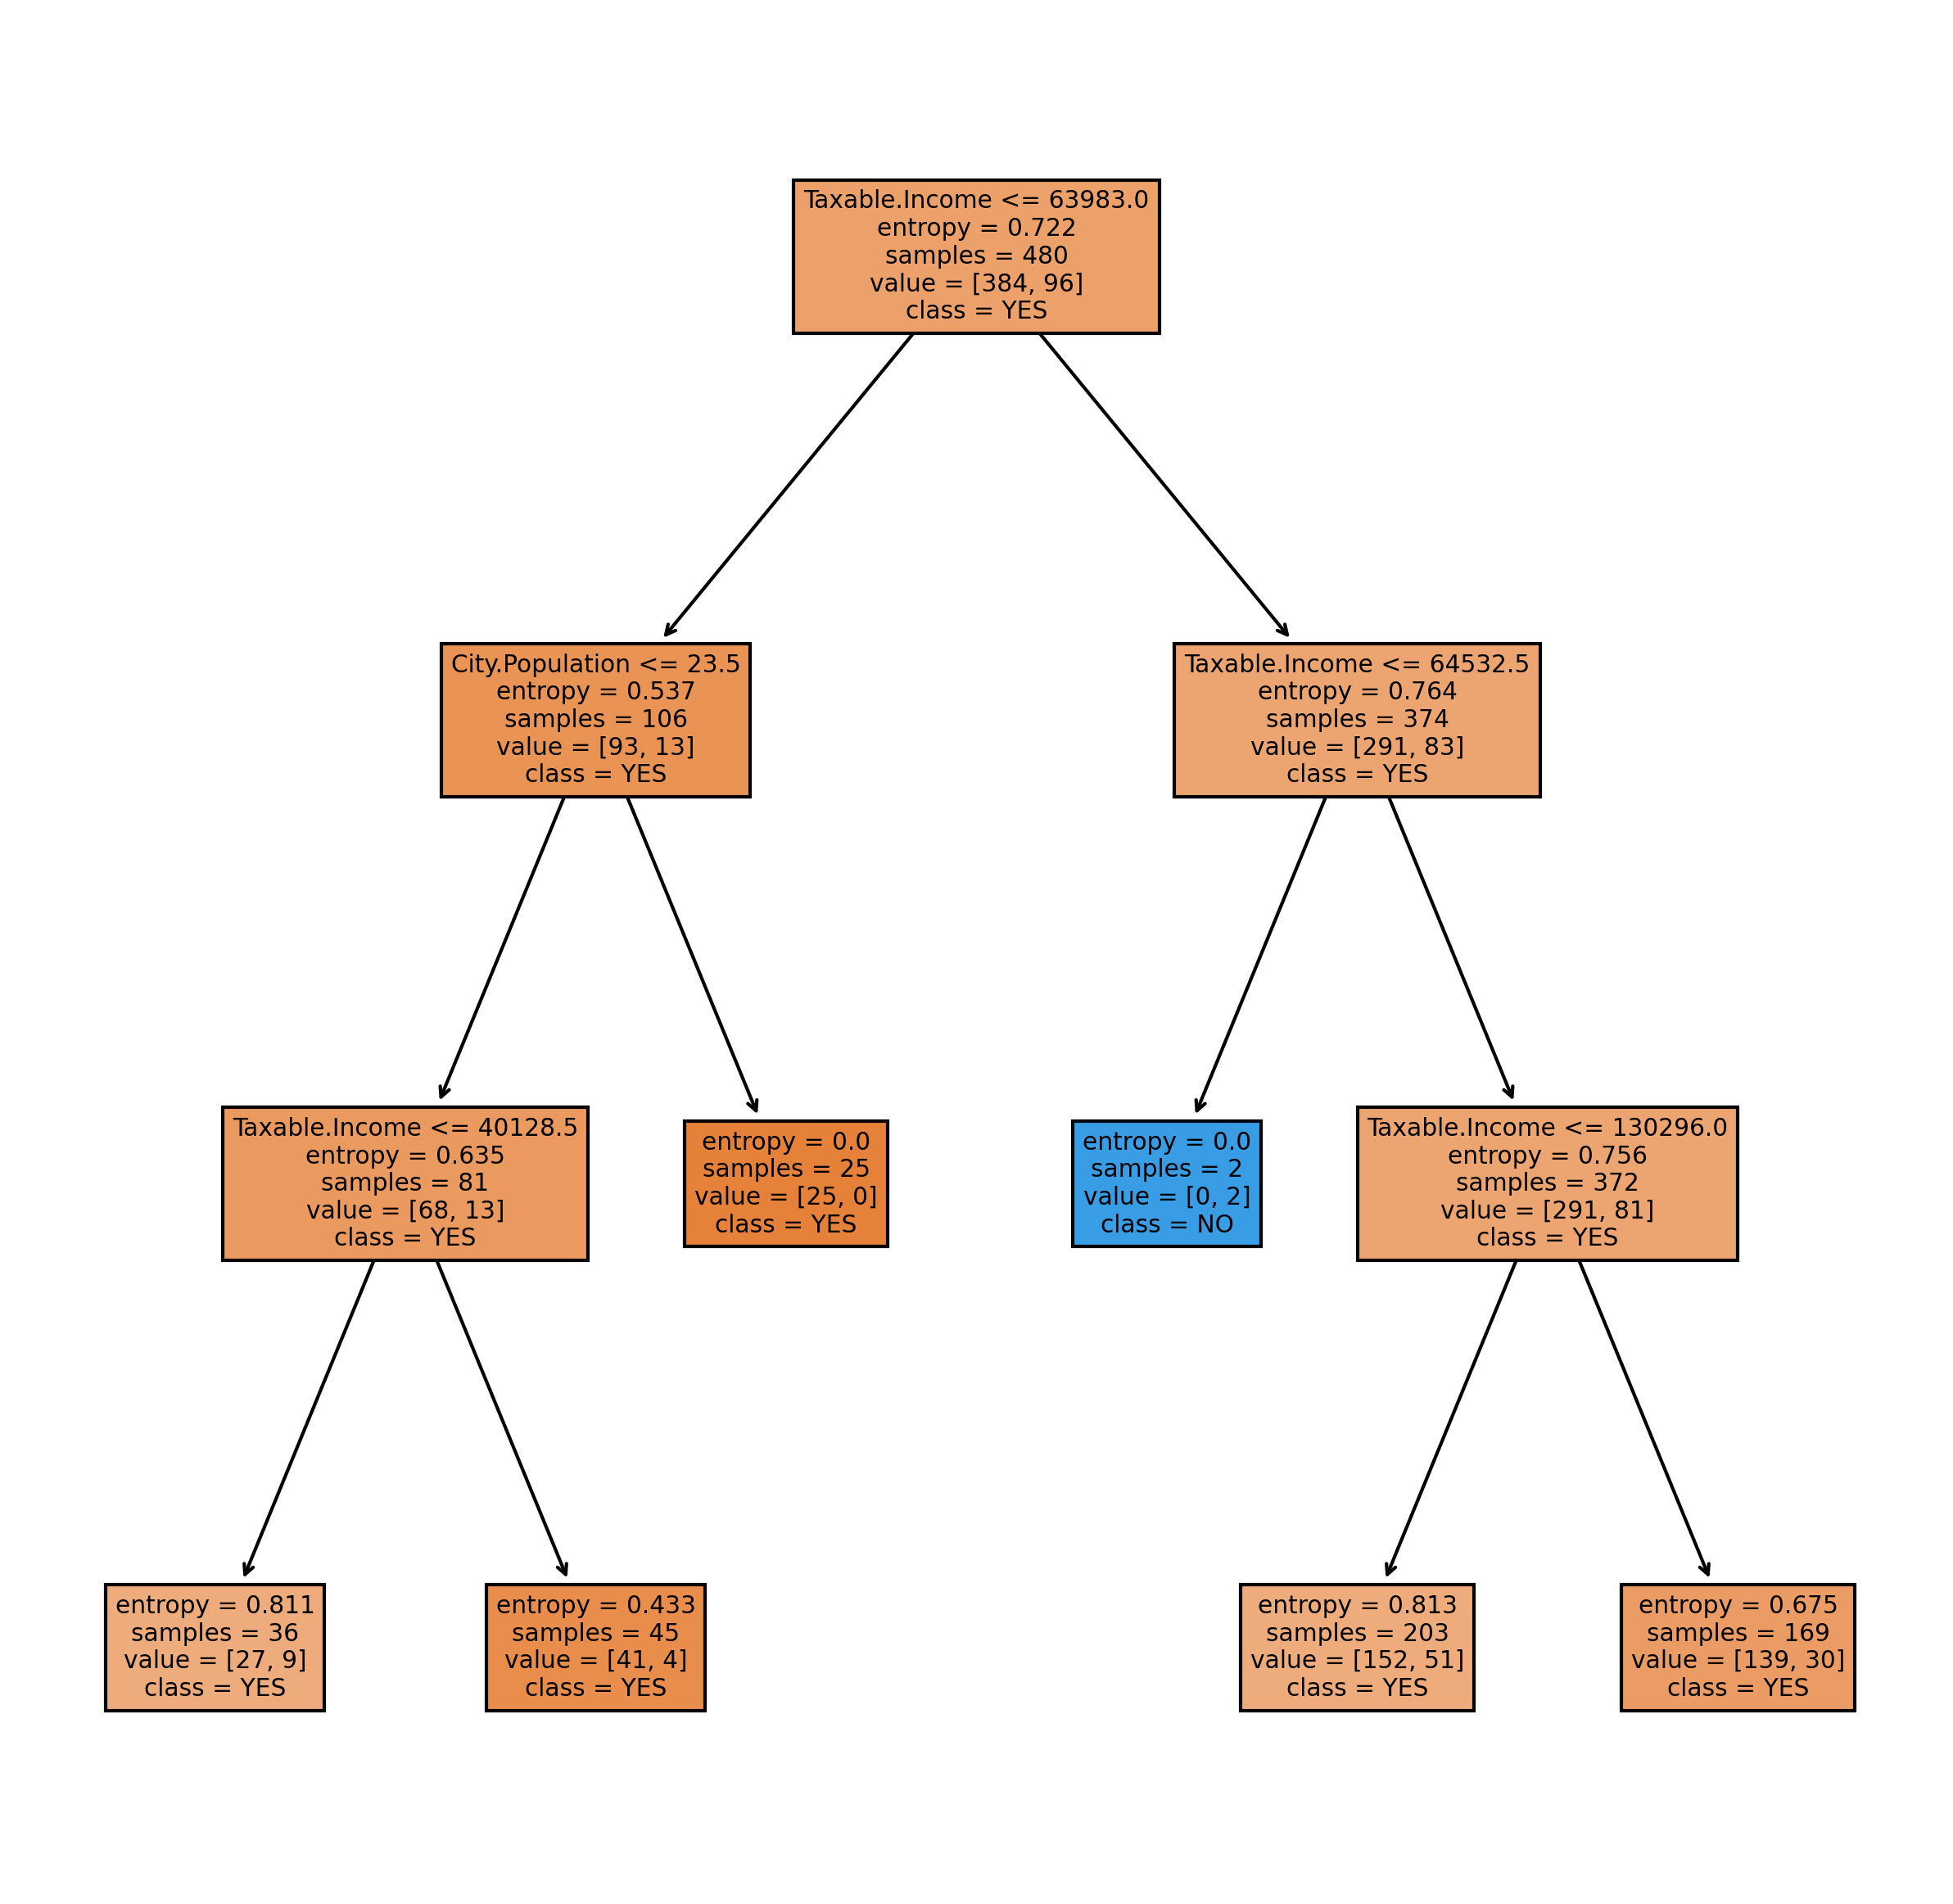

In [184]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [185]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8041666666666667

In [186]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [187]:
y_pred= model.predict(x_test)

In [188]:
# Here first column is for 'Good' , & second is for 'Risky'

model.predict_proba(x_test)

array([[0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.74876847, 0.25123153],
       [0.82248521, 0.17751479],
       [0.74876847, 0.25123153],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.74876847, 0.25123153],
       [0.91111111, 0.08888889],
       [0.91111111, 0.08888889],
       [0.82248521, 0.17751479],
       [0.75      , 0.25      ],
       [0.82248521, 0.17751479],
       [0.91111111, 0.08888889],
       [0.82248521, 0.17751479],
       [0.82248521, 0.17751479],
       [0.82248521, 0.17751479],
       [0.82248521, 0.17751479],
       [0.74876847, 0.25123153],
       [0.75      , 0.25      ],
       [0.74876847, 0.25123153],
       [0.91111111, 0.08888889],
       [0.91111111, 0.08888889],
       [0.74876847, 0.25123153],
       [0.74876847, 0.25123153],
       [0.74876847, 0.25123153],
       [1.        , 0.        ],
       [0.74876847, 0.25123153],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

## Building Decision Tree Classifier(CART) using Gini Criteria

In [189]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [190]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [191]:
# Prediction and computing the accuracy

pred = model.predict(x_test)
pred
np.mean(pred == y_test)

0.7666666666666667

In [192]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor

In [193]:
array = data.values
X = array[:,0:3]
Y = array[:,3]

In [194]:
Y

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0

In [195]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33, random_state=1)

In [196]:
model1 = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [198]:
# Find the accuracy
model.score(X_test, y_test)

0.7878787878787878

END

## Q2.) A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

# Company_data

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [385]:
company= pd.read_csv('C:/Users/DELL 5459/Downloads/excelr/Assignment/14 Decision Trees/Company_Data.csv')

In [386]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [387]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [388]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [389]:
# Duplicates
company[company.duplicated()].shape

(0, 11)

In [390]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

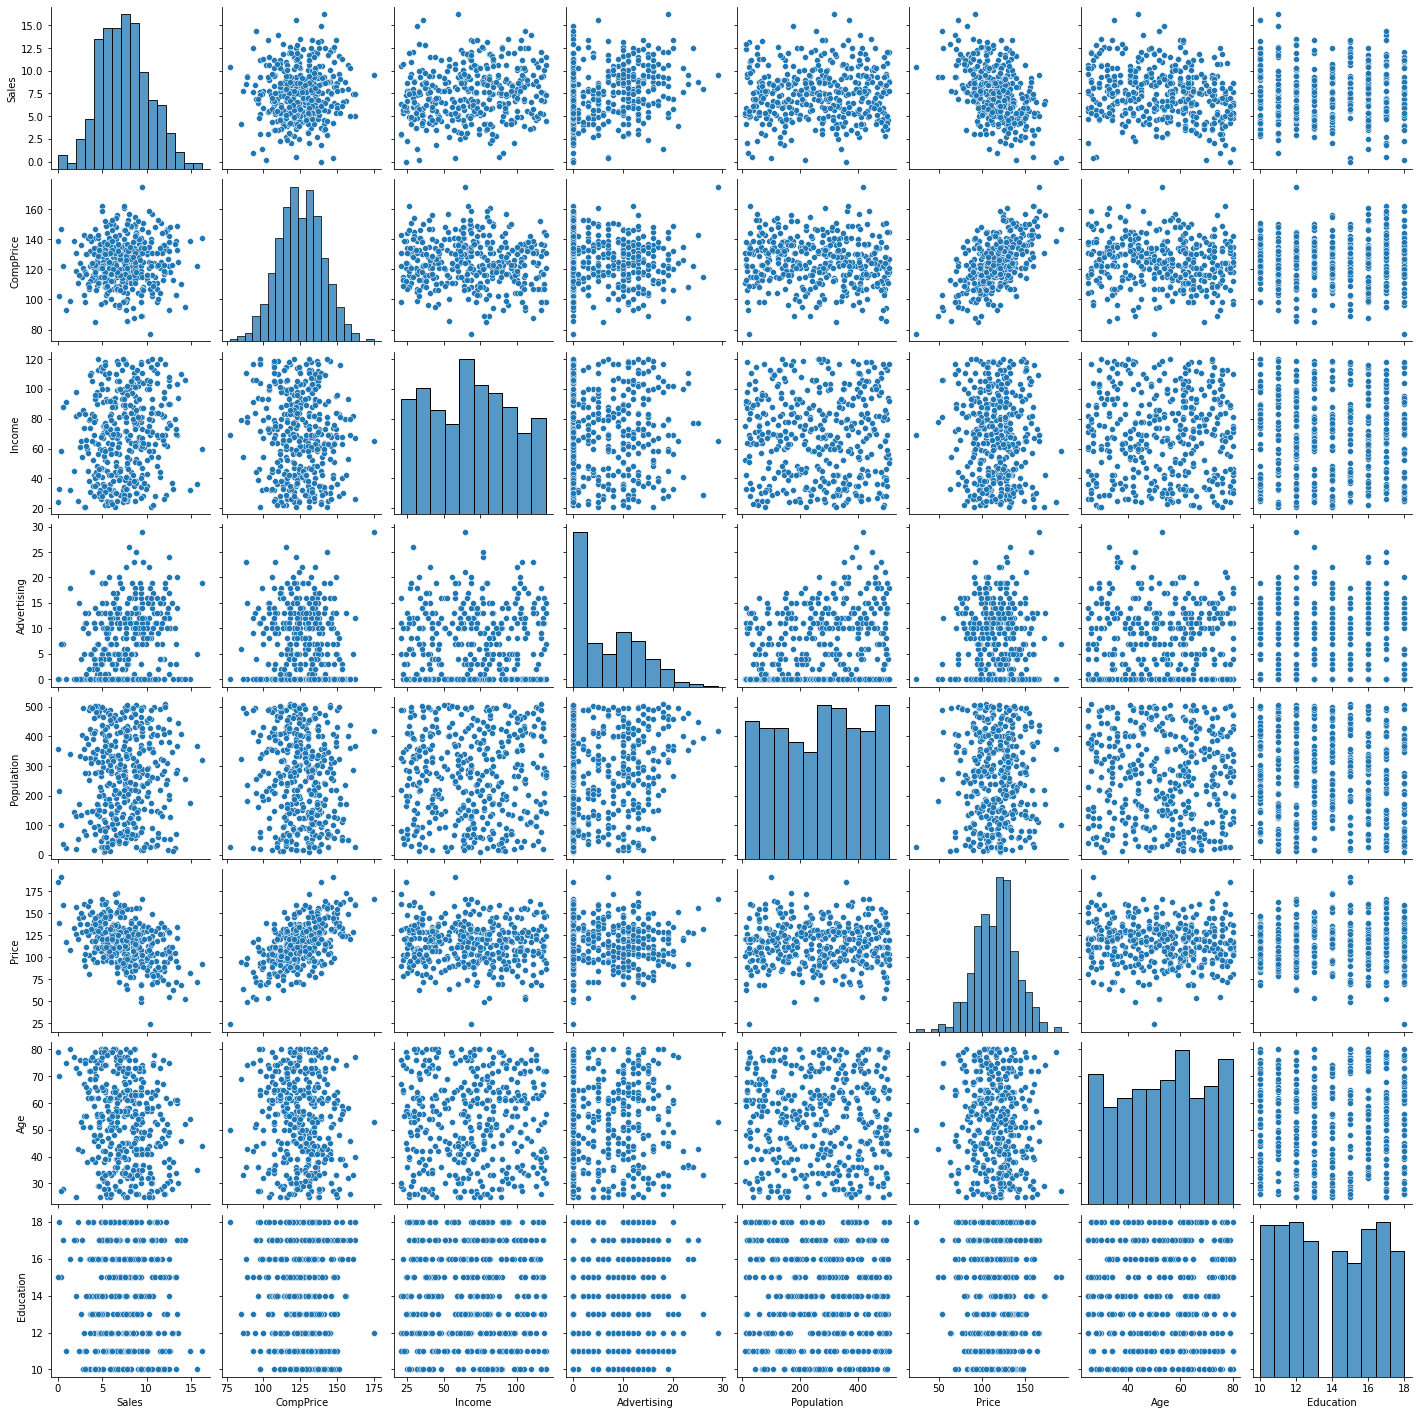

In [391]:
# Scatter plot and Correaltion Analysis
sns.pairplot(company)

In [392]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [393]:
company_df= company.copy()

In [420]:
# Converting the sales data in to Categorical
company_df.loc[company['Sales']>=8, 'Sale']='1'  # High=1 Taken based on the mean value
company_df.loc[company['Sales']<=8, 'Sale']='0'  # Low=0 

In [395]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [396]:
company_df= company_df.drop('Age', axis=1)
company_df= company_df.drop('Education', axis=1)
company_df= company_df.drop('Urban', axis=1)
company_df= company_df.drop('US', axis=1)
company_df=company_df.drop('Sales', axis=1)

In [397]:
company_df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Sale
0,138,73,11,276,120,Bad,1
1,111,48,16,260,83,Good,1
2,113,35,10,269,80,Medium,1
3,117,100,4,466,97,Medium,0
4,141,64,3,340,128,Bad,0


In [398]:
label_encoder= preprocessing.LabelEncoder()
company_df['ShelveLoc']=label_encoder.fit_transform(company_df['ShelveLoc'])

In [399]:
company_df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Sale
0,138,73,11,276,120,0,1
1,111,48,16,260,83,1,1
2,113,35,10,269,80,2,1
3,117,100,4,466,97,2,0
4,141,64,3,340,128,0,0


### Note- ShelveLoc= Bad=0, Good=1, Medium=2 and Sales= High=1, Low=0

In [400]:
company_df=company_df.astype({'Sale':'int'})

## Normalization Function

In [401]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [402]:
company_df=norm_func(company_df)

In [403]:
company_df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Sale
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.0


In [404]:
company_df1=company_df.astype({"ShelveLoc":'int',"Sale":'int'})

In [405]:
company_df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Sale
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.0


In [407]:
x= company_df1.iloc[:,0:6]
y= company_df1.iloc[:,6]

In [408]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,0.622449,0.525253,0.379310,0.533066,0.574850,0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0
...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1
397,0.867347,0.050505,0.413793,0.717435,0.808383,1
398,0.234694,0.585859,0.241379,0.549098,0.425150,0


In [409]:
y  # Sale - High=1, Low=0

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sale, Length: 400, dtype: int32

In [410]:
company_df1['Sale'].unique()

array([1, 0])

In [411]:
company_df1.Sale.value_counts()

0    236
1    164
Name: Sale, dtype: int64

## Splitting data into Training and Testing Dataset

In [412]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [413]:
model= DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

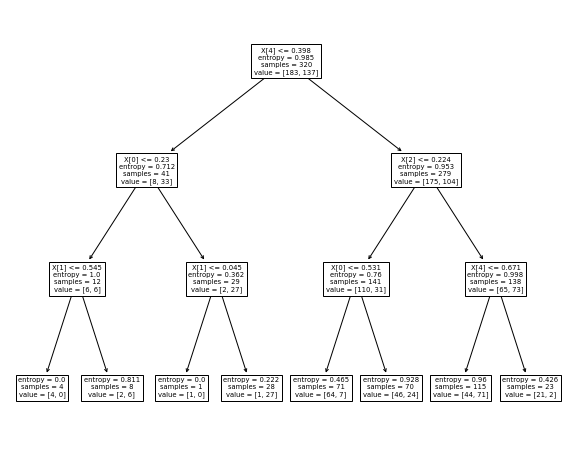

In [414]:
# Plot the Decision tree
tree.plot_tree(model);

[Text(465.0, 990.9375, 'Price <= 0.398\nentropy = 0.985\nsamples = 320\nvalue = [183, 137]\nclass = High'),
 Text(232.5, 707.8125, 'CompPrice <= 0.23\nentropy = 0.712\nsamples = 41\nvalue = [8, 33]\nclass = Low'),
 Text(116.25, 424.6875, 'Income <= 0.545\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]\nclass = High'),
 Text(58.125, 141.5625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = High'),
 Text(174.375, 141.5625, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]\nclass = Low'),
 Text(348.75, 424.6875, 'Income <= 0.045\nentropy = 0.362\nsamples = 29\nvalue = [2, 27]\nclass = Low'),
 Text(290.625, 141.5625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = High'),
 Text(406.875, 141.5625, 'entropy = 0.222\nsamples = 28\nvalue = [1, 27]\nclass = Low'),
 Text(697.5, 707.8125, 'Advertising <= 0.224\nentropy = 0.953\nsamples = 279\nvalue = [175, 104]\nclass = High'),
 Text(581.25, 424.6875, 'CompPrice <= 0.531\nentropy = 0.76\nsamples = 141\nvalue = [110, 31]\nclass = High'),
 Text(

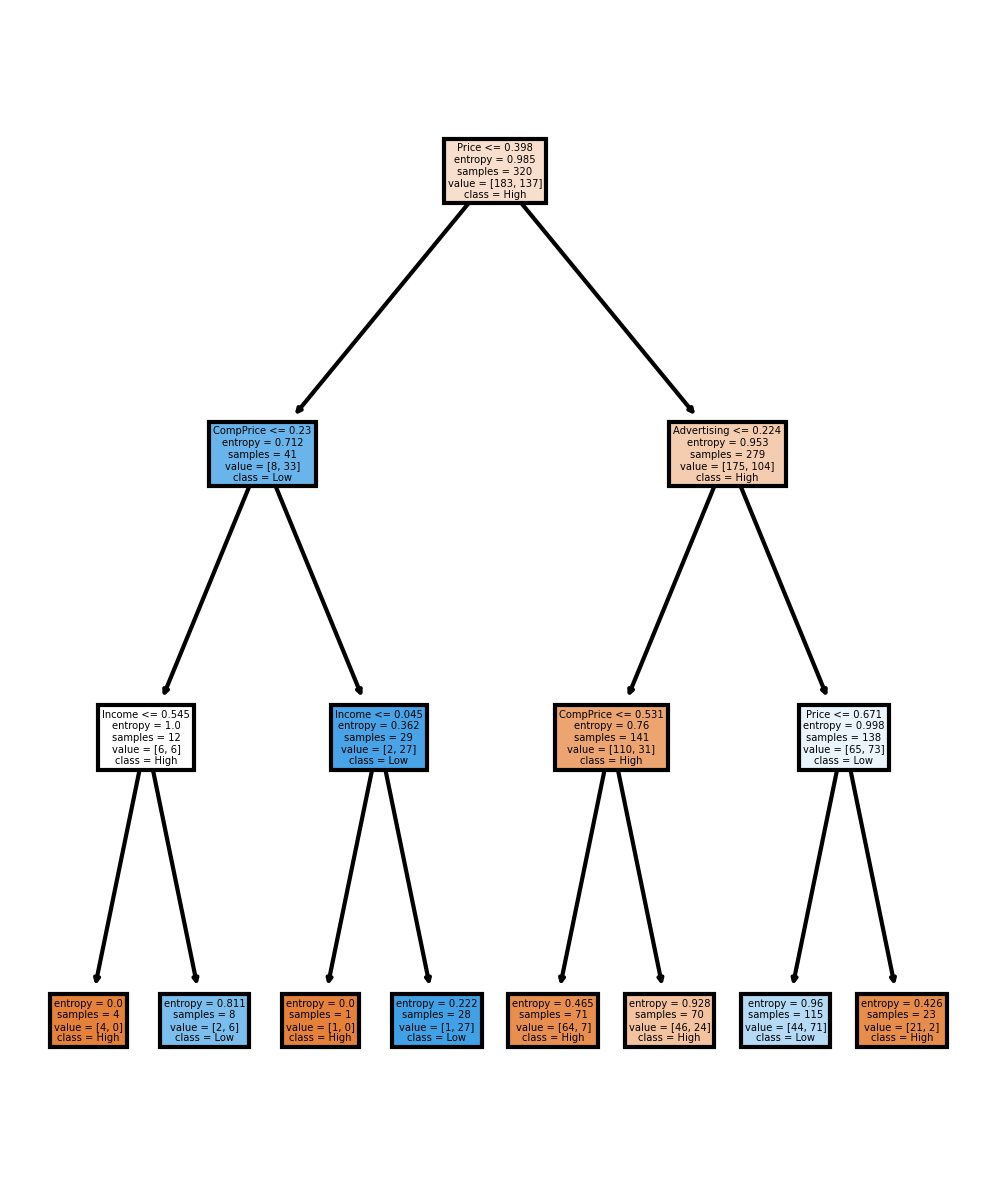

In [415]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Sale']
cn=['High','Low']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,5),dpi=300)
tree.plot_tree(model,feature_names=fn,
              class_names=cn,filled=True)

In [416]:
# Predict on tesst data
preds= model.predict(x_test)
pd.Series(preds).value_counts()

0    51
1    29
dtype: int64

In [417]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Confusion Matrix

In [418]:
pd.crosstab(y_test, preds)

col_0,0,1
Sale,,
0,41,12
1,10,17


## Accuracy

In [419]:
np.mean(preds==y_test)

0.725